# IRIS DATASET TENSORFLOW



<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.png" width="600">

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
## WE MUST CONVERT TARGET INTO NUMERICAL ARRAY
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


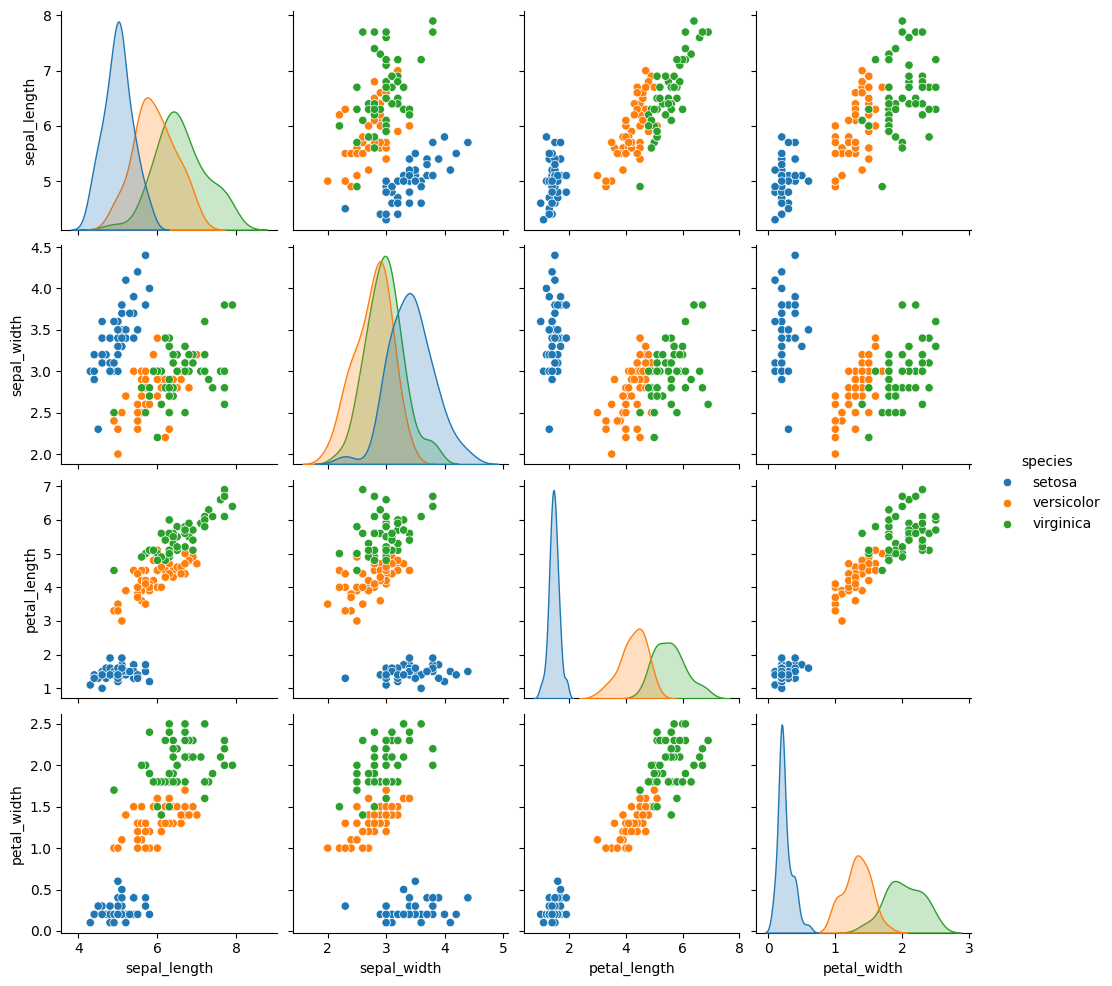

In [4]:
sns.pairplot(iris, hue='species')

In [5]:
X_ =iris.iloc[:,:-1]   # feature matrix NOT NORMALIZED/STANDARDIZED
y =iris.iloc[:,-1]  # target vector

In [6]:
class_mapping = {'setosa': 0,
                 'versicolor': 1,
                 'virginica': 2
                 }

y = y.map(class_mapping).values # after mapping
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
## STARNDARDIZATION
ss = StandardScaler()
X = ss.fit_transform(X_) # we standardize only the Features not the target!!

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

In [9]:
y.ndim

1

## TRANSFORM THE TARGET into DUMMY!!!!!!

In [10]:
# # 1 One hot encoding (dummy target output)
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# y_train = enc.fit_transform(y_train[:, np.newaxis]).toarray()
# se usiamo il one hot encoder ---> optimizer == categorical_crossentropy,

# # 2 to_categorical di Keras (dummy target output)
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y_train, num_classes=n)
# se usiamo il to_categorical di Keras ---> optimizer == categorical_crossentropy,

########################################################################

# # 3 labelencoder or map function (numerical target output)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# loss = 'sparse_categorical_crossentropy'
# altrimenti loss optimizer == sparse_categorical_crossentropy


from tensorflow.keras.utils import to_categorical

nclasses = len(np.unique(y)) # 3 classes!
y_train = to_categorical(y_train, num_classes=nclasses)

In [11]:
y_train.ndim

2

In [12]:
y_train.shape

(105, 3)

In [13]:
y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0

In [14]:
X_train.shape[1] # num columns

4

In [15]:
import tensorflow as tf

tf.random.set_seed(667) # fix random initialization
model = Sequential()  #initializa the net

model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16,activation='tanh'))

model.add(Dense(nclasses, activation='softmax')) ##nclasses==3

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 739 (2.89 KB)
Trainable params: 739 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


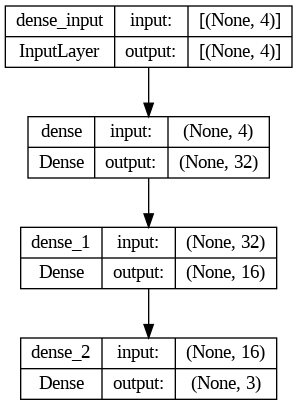

In [17]:
tf.keras.utils.plot_model(model, to_file='model_1.png', show_shapes=True)

In [ ]:
#the sparse_categorical_crossentropy is defined as categorical crossentropy with integer targets
#the categorical_crossentropy is defined as categorical cross-entropy between an output tensor and a target tensor.

In [18]:
from tensorflow.keras.optimizers import Adam

lr = 0.04
model.compile(optimizer=Adam(learning_rate=lr),
              loss='categorical_crossentropy',# 3 classes, not a binary classification!
              metrics=['accuracy']
              )

In [19]:
model.fit(X_train,
          y_train,
          epochs=10
          )

Epoch 1/10
4/4 [==============================] - 2s 15ms/step - loss: 0.9228 - accuracy: 0.4952
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.3704 - accuracy: 0.8286
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2677 - accuracy: 0.9048
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1910 - accuracy: 0.9143
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1183 - accuracy: 0.9619
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0956 - accuracy: 0.9619
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0787 - accuracy: 0.9810
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0935 - accuracy: 0.9524
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0595 - accuracy: 0.9619
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0513 - accuracy: 0.9714


In [20]:
loss, acc = model.evaluate(X_train, y_train)
print("Loss sul train set: %.4f" % loss)
print("Accuracy sul train set: %.4f" % acc)

4/4 [==============================] - 0s 4ms/step - loss: 0.0647 - accuracy: 0.9714
Loss sul train set: 0.0647
Accuracy sul train set: 0.9714


In [21]:
y_testx = to_categorical(y_test, num_classes=nclasses)

In [22]:
loss, acc = model.evaluate(X_test, y_testx)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

2/2 [==============================] - 0s 7ms/step - loss: 0.0919 - accuracy: 0.9778
Loss sul test set: 0.0919
Accuracy sul test set: 0.9778


In [23]:
y_pred = model.predict(X_test) #predict_proba sklearn
y_pred

2/2 [==============================] - 0s 6ms/step


array([[3.00113257e-04, 5.44694848e-02, 9.45230424e-01],
       [9.99971986e-01, 1.89576531e-05, 9.08478887e-06],
       [4.30467684e-04, 9.98852134e-01, 7.17449933e-04],
       [1.73866283e-04, 9.99655485e-01, 1.70708081e-04],
       [2.95762438e-04, 9.99604881e-01, 9.94228249e-05],
       [3.00696748e-03, 9.95638430e-01, 1.35455688e-03],
       [9.51102236e-04, 2.97194928e-01, 7.01853931e-01],
       [1.78302493e-04, 4.11407603e-03, 9.95707631e-01],
       [3.13761411e-04, 9.99172211e-01, 5.14096057e-04],
       [3.23227490e-04, 2.30199575e-01, 7.69477189e-01],
       [9.99959826e-01, 3.05635476e-05, 9.61270780e-06],
       [2.46231648e-04, 9.23301935e-01, 7.64518157e-02],
       [1.98373105e-04, 9.99606311e-01, 1.95315501e-04],
       [9.99969959e-01, 2.08249985e-05, 9.12936866e-06],
       [4.28283325e-04, 2.46425271e-02, 9.74929214e-01],
       [1.78305243e-04, 1.40271829e-02, 9.85794544e-01],
       [9.99970794e-01, 2.00517788e-05, 9.12422456e-06],
       [9.99968529e-01, 2.21921

In [24]:
np.argmax(model.predict(X_test), axis=-1)

2/2 [==============================] - 0s 4ms/step


array([2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2,
       2])

2/2 [==============================] - 0s 11ms/step


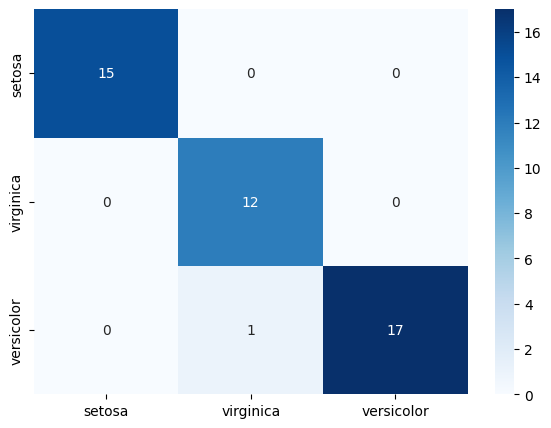

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

labels = ['setosa','virginica','versicolor']
sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True,fmt=".0f",cmap='Blues');

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [30]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

In [31]:
model.save('iris.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
load_model = load_model('iris.h5')

In [33]:
# [[Feature1, Feature2....,Feature[30]]]
new_sample = [[1,6,6,8],[0,0,2,0]]
len(new_sample[0])

4

In [34]:
# Scaling
scaler = MinMaxScaler()
new_sample_scaled = scaler.fit_transform(new_sample)

In [35]:
load_model.predict(new_sample_scaled)

1/1 [==============================] - 0s 71ms/step


array([[1.5807063e-03, 1.6331740e-01, 8.3510190e-01],
       [5.0329752e-03, 9.9457669e-01, 3.9032049e-04]], dtype=float32)

In [36]:
prediction = load_model.predict(new_sample_scaled)

1/1 [==============================] - 0s 39ms/step


In [37]:
predict_label=np.argmax(prediction,axis=1) # index column setosa - verginica - versicolor
predict_label

array([2, 1])

In [40]:
res = []
def pred(x):
    for i in x:
        if i==0:
            res.append('setosa')
        elif i==1:
            res.append('virginica')
        else:
            res.append('versicolor')
    return res

In [41]:
pred(predict_label)

['versicolor', 'virginica']

## Early Stopping + Validation

Early Stopping -->Stop training when a monitored metric has stopped improving.

Assuming the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss', and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.

The quantity to be monitored needs to be available in logs dict. To make it so, pass the loss or metrics at model.compile().

Arguments

    - monitor: Quantity to be monitored.
    - min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than  min_delta, will count as no improvement.
    - patience: Number of epochs with no improvement after which training will be stopped.
    - verbose: verbosity mode.
    - mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
    - baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
    - restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.


In [43]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [44]:
# Split into train/test + Validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=667)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=667) # 0.25 x 0.8 = 0.2


model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu',kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(3,activation='softmax',kernel_initializer='random_normal'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics =['accuracy'])

monitor = EarlyStopping(monitor='val_loss',
                        min_delta=1e-3,
                        patience=5,
                        verbose=1,
                        mode='auto',
                        restore_best_weights=True)

In [45]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val,y_val),
                    callbacks=[monitor],
                    verbose=2,
                    epochs=1000)

Epoch 1/1000
3/3 - 2s - loss: 1.0985 - accuracy: 0.3452 - val_loss: 1.0953 - val_accuracy: 0.8571 - 2s/epoch - 560ms/step
Epoch 2/1000
3/3 - 0s - loss: 1.0954 - accuracy: 0.8571 - val_loss: 1.0927 - val_accuracy: 0.8929 - 40ms/epoch - 13ms/step
Epoch 3/1000
3/3 - 0s - loss: 1.0927 - accuracy: 0.8810 - val_loss: 1.0886 - val_accuracy: 0.8929 - 36ms/epoch - 12ms/step
Epoch 4/1000
3/3 - 0s - loss: 1.0889 - accuracy: 0.8810 - val_loss: 1.0830 - val_accuracy: 0.9286 - 39ms/epoch - 13ms/step
Epoch 5/1000
3/3 - 0s - loss: 1.0841 - accuracy: 0.8690 - val_loss: 1.0754 - val_accuracy: 0.9286 - 38ms/epoch - 13ms/step
Epoch 6/1000
3/3 - 0s - loss: 1.0777 - accuracy: 0.8571 - val_loss: 1.0653 - val_accuracy: 0.9286 - 36ms/epoch - 12ms/step
Epoch 7/1000
3/3 - 0s - loss: 1.0691 - accuracy: 0.8452 - val_loss: 1.0532 - val_accuracy: 0.9286 - 57ms/epoch - 19ms/step
Epoch 8/1000
3/3 - 0s - loss: 1.0581 - accuracy: 0.8214 - val_loss: 1.0366 - val_accuracy: 0.8929 - 38ms/epoch - 13ms/step
Epoch 9/1000
3/3 

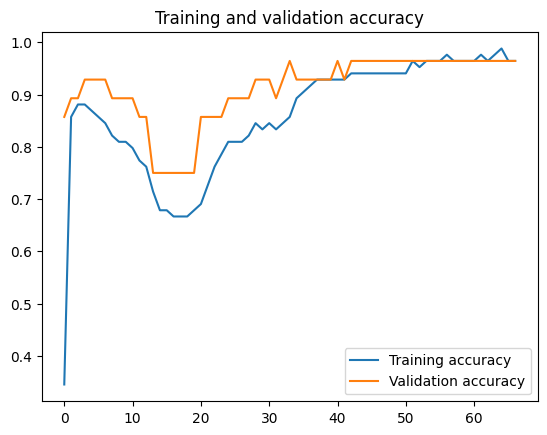

In [46]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

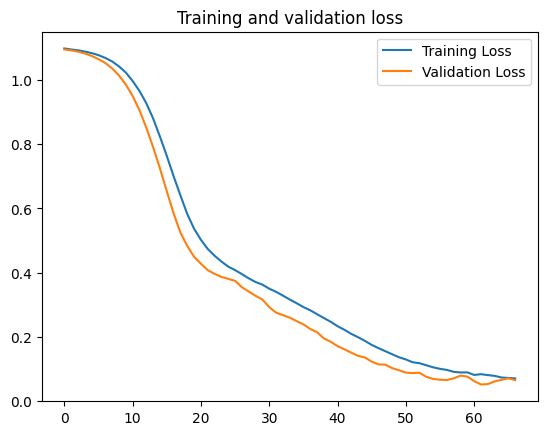

In [47]:
plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()